In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

data = pd.read_csv('data.csv')
n = len(data)
num_plays = data['play_id']
useful_columns = ['quarter', 'poss_id', 'poss_type', 'off_team', 'play_type', 'off_def', 'player_type',
       'PlayerTeam', 'play_id', 'sequence_id', 'result_id',
       'result_num', 'result_type', 'result_contest',
       'result_shotclock', 'player_x', 'player_y', 'result_pts',
       'play_sis_zone', 'result_dist']

In [3]:
data.columns

Index(['ï»¿filename', 'nba_game_id', 'game_date', 'home_team', 'away_team',
       'quarter', 'poss_id', 'poss_type', 'off_team', 'def_team', 'poss_time',
       'play_code', 'sbg_id', 'play_type', 'off_def', 'player_type',
       'PlayerTeam', 'PlayerJersey', 'player_name', 'player_nba_id',
       'shotclock', 'gameclock', 'play_id', 'sequence_id', 'result_id',
       'result_num', 'result_type', 'result_contest', 'result_gameclock',
       'result_shotclock', 'player_x', 'player_y', 'result_pts',
       'play_sis_zone', 'result_dist'],
      dtype='object')

In [4]:
data.head()

,ï»¿filename,nba_game_id,game_date,home_team,away_team,quarter,poss_id,poss_type,off_team,def_team,...,result_num,result_type,result_contest,result_gameclock,result_shotclock,player_x,player_y,result_pts,play_sis_zone,result_dist
0,DET_MIL_20221031_Q1.xml,22200100,10/31/22 0:00,MIL,DET,1,1,Halfcourt,MIL,DET,...,NaN,NaN,NaN,NaN,NaN,28.72,-19.61,NaN,Right Above Break 3,NaN
1,DET_MIL_20221031_Q1.xml,22200100,10/31/22 0:00,MIL,DET,1,1,Halfcourt,MIL,DET,...,NaN,NaN,NaN,NaN,NaN,24.75,-9.47,NaN,Mid-Right Midrange,NaN
2,DET_MIL_20221031_Q1.xml,22200100,10/31/22 0:00,MIL,DET,1,1,Halfcourt,MIL,DET,...,NaN,NaN,NaN,NaN,NaN,20.97,-11.14,NaN,Mid-Right Above Break 3,NaN
3,DET_MIL_20221031_Q1.xml,22200100,10/31/22 0:00,MIL,DET,1,1,Halfcourt,MIL,DET,...,1.0,TOV,NaN,705.2,10.1,26.41,-18.99,0.0,Right Above Break 3,25.793805
4,DET_MIL_20221031_Q1.xml,22200100,10/31/22 0:00,MIL,DET,1,2,Halfcourt,DET,MIL,...,NaN,NaN,NaN,NaN,NaN,-19.41,19.95,NaN,Right Above Break 3,NaN


In [73]:
for play in data.index:
    if data["PlayerTeam"][play] == "Away":
        data.at[play, "PlayerTeam"] = data["away_team"][play]
    else:
        data.at[play, "PlayerTeam"] = data["home_team"][play]

In [57]:
sequence_data = data.loc[data.PlayerTeam == data.off_team].groupby(['nba_game_id', 'quarter', 'sequence_id']).aggregate({
    'home_team' : 'first',
    'away_team' : 'first',
    'poss_type' : 'first',
    'off_team' : 'first',
    'PlayerTeam' : 'last',
    'play_type' : 'last',
    'player_x' : 'last',
    'player_y' : 'last',
    'play_sis_zone' : 'last',
    'result_pts' : 'max',
    'result_shotclock' : 'last',
    'result_type' : 'last',
    'result_num' : 'last',
    'sbg_id' : 'last',
    'player_type' :'last',
    'game_date' : 'count'
}).sort_values("game_date", ascending = False)
sequence_data

,,,home_team,away_team,poss_type,off_team,PlayerTeam,play_type,player_x,player_y,play_sis_zone,result_pts,result_shotclock,result_type,result_num,sbg_id,player_type,game_date
nba_game_id,quarter,sequence_id,,,,,,,,,,,,,,,,
22200135,4,11,NYK,BOS,Halfcourt,NYK,NYK,Ball Screen,24.49,8.20,Mid-Left Midrange,NaN,NaN,None,NaN,47,Screener,20
22200114,4,18,SAS,TOR,Halfcourt,SAS,SAS,Closeout,23.02,1.64,Mid-Left Midrange,0.0,3.6,Hook,1.0,77,BH Def,20
22200169,3,17,SAS,MEM,Halfcourt,SAS,SAS,Rim Gather,-44.22,4.25,Rim,2.0,4.3,Layup,1.0,56,Ball-Handler,19
22200158,1,2,LAC,CLE,Halfcourt,LAC,LAC,Closeout,-32.51,15.42,Right Midrange,0.0,5.7,Catch & Shoot,1.0,13,BH Def,18
22200130,4,25,PHX,POR,Halfcourt,PHX,PHX,Closeout,40.40,-9.42,Right Short Mid,3.0,10.2,Catch & Shoot,1.0,95,BH Def,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22200185,2,27,WAS,UTA,Transition,WAS,WAS,Transition,-11.94,4.15,Short Backcourt,2.0,22.7,Dunk,1.0,91,Ball-Handler,1
22200146,1,2,DET,OKC,Halfcourt,DET,DET,Rim Gather,-40.11,-1.64,Rim,2.0,24.0,Off-Lob / Tip,2.0,4,Ball-Handler,1
22200185,2,66,WAS,UTA,Halfcourt,WAS,WAS,Rim Gather,38.91,2.32,Rim,2.0,24.0,Layup,2.0,219,Ball-Handler,1


In [74]:
data.loc[data.nba_game_id == 22200135].loc[data.sequence_id == 11][useful_columns]

,quarter,poss_id,poss_type,off_team,play_type,off_def,player_type,PlayerTeam,play_id,sequence_id,result_id,result_num,result_type,result_contest,result_shotclock,player_x,player_y,result_pts,play_sis_zone,result_dist
40831,1,11,Transition,NYK,Transition,OFF,Ball-Handler,NYK,17,11,NaN,NaN,NaN,NaN,NaN,33.39,-6.83,NaN,Deep Backcourt,NaN
40832,1,11,Transition,NYK,Transition,DEF,BH Def,BOS,17,11,NaN,NaN,NaN,NaN,NaN,12.22,7.47,NaN,Short Backcourt,NaN
40833,1,11,Transition,NYK,Transition,OFF,Ball-Handler,NYK,18,11,0022200135_1_11,1.0,Layup,Plus,21.2,-22.92,-10.33,0.0,Mid-Left Midrange,1.0
40834,1,11,Transition,NYK,Transition,DEF,BH Def,BOS,18,11,0022200135_1_11,1.0,Layup,Plus,21.2,-23.95,-1.25,0.0,Mid-Left Midrange,1.0
41086,2,7,Transition,BOS,Transition,OFF,Ball-Handler,BOS,16,11,0022200135_2_8,1.0,Layup,Plus,21.3,-20.08,-3.75,2.0,Short Backcourt,0.0
41087,2,7,Transition,BOS,Transition,DEF,BH Def,NYK,16,11,0022200135_2_8,1.0,Layup,Plus,21.3,-13.33,2.16,2.0,Short Backcourt,0.0
41408,3,10,Halfcourt,NYK,DHO,OFF,Ball-Handler,NYK,18,11,NaN,NaN,NaN,NaN,NaN,-0.54,-14.50,NaN,Short Backcourt,NaN
41409,3,10,Halfcourt,NYK,DHO,DEF,BH Def,BOS,18,11,NaN,NaN,NaN,NaN,NaN,9.76,-11.15,NaN,Mid-Right Above Break 3,NaN
41410,3,10,Halfcourt,NYK,DHO,DEF,SC Def,BOS,18,11,NaN,NaN,NaN,NaN,NaN,27.53,-13.11,NaN,Mid-Right Midrange,NaN
41411,3,10,Halfcourt,NYK,DHO,OFF,Screener,NYK,18,11,NaN,NaN,NaN,NaN,NaN,25.35,-15.37,NaN,Right Midrange,NaN


In [63]:
data.result_type.unique()

array([nan, 'TOV', 'Layup', 'Catch & Shoot', '1-2D Pull-Up',
       'Semi Off-Move', 'Dunk', 'Hard Off-Move', 'Floater', '3+D Pull-Up',
       'Leaner', 'Off-Lob / Tip', 'Post Fade', 'Face-Up', 'Hook',
       'Take FT', 'Take Side', 'PU Fade', 'Side Out', 'SC Violation',
       'Putback', 'Jump Ball'], dtype=object)

In [33]:
data.loc[data.nba_game_id == 22200100].loc[data.sequence_id == 1][["nba_game_id", "quarter","play_id", "sequence_id", "poss_id", "result_id"]]

,nba_game_id,quarter,play_id,sequence_id,poss_id,result_id
0,22200100,1,1,1,1,NaN
1,22200100,1,1,1,1,NaN
2,22200100,1,1,1,1,NaN
3,22200100,1,1,1,1,0022200100_1_1
254,22200100,2,1,1,1,NaN
255,22200100,2,1,1,1,NaN
256,22200100,2,1,1,1,0022200100_2_1
257,22200100,2,1,1,1,0022200100_2_1
512,22200100,3,1,1,1,NaN
513,22200100,3,1,1,1,NaN


In [11]:
data.result_pts.value_counts()

0.0    21595
2.0    10080
3.0     4986
1.0      898
4.0       41
Name: result_pts, dtype: int64

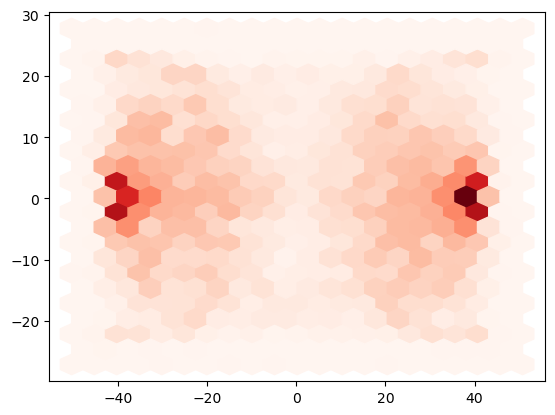

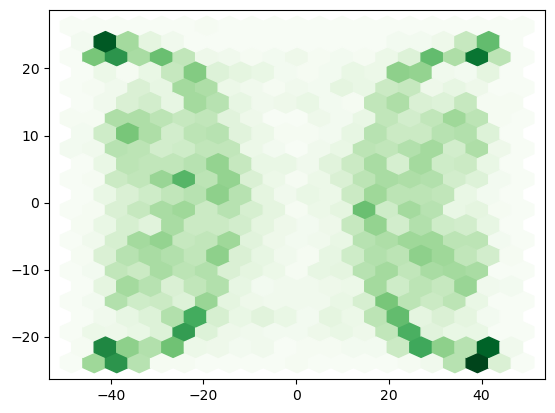

In [26]:
plt.hexbin(data.loc[data.result_pts == 2]['player_x'], data[data.result_pts == 2]['player_y'], gridsize = 20, cmap = 'Reds')
plt.show()
plt.hexbin(data.loc[data.result_pts == 3]['player_x'], data[data.result_pts == 3]['player_y'], gridsize = 20, cmap = "Greens")
plt.show()

TOV : Shots Taken: 3424 Shots W Points: 11 
Conversion Rate: 0.3212616822429907 %
Total Points: 0.0 

Layup : Shots Taken: 7310 Shots W Points: 4715 
Conversion Rate: 64.50068399452805 %
Total Points: 9335.0 

Catch & Shoot : Shots Taken: 6247 Shots W Points: 2301 
Conversion Rate: 36.83368016647991 %
Total Points: 6840.0 

1-2D Pull-Up : Shots Taken: 2392 Shots W Points: 933 
Conversion Rate: 39.00501672240803 %
Total Points: 2386.0 

Semi Off-Move : Shots Taken: 2458 Shots W Points: 916 
Conversion Rate: 37.26606997558991 %
Total Points: 2645.0 

Dunk : Shots Taken: 1168 Shots W Points: 1050 
Conversion Rate: 89.8972602739726 %
Total Points: 2091.0 

Hard Off-Move : Shots Taken: 450 Shots W Points: 159 
Conversion Rate: 35.333333333333336 %
Total Points: 438.0 

Floater : Shots Taken: 3732 Shots W Points: 1915 
Conversion Rate: 51.31296891747053 %
Total Points: 3767.0 

3+D Pull-Up : Shots Taken: 2879 Shots W Points: 1116 
Conversion Rate: 38.76345953456061 %
Total Points: 2809.0 

L

<BarContainer object of 16 artists>

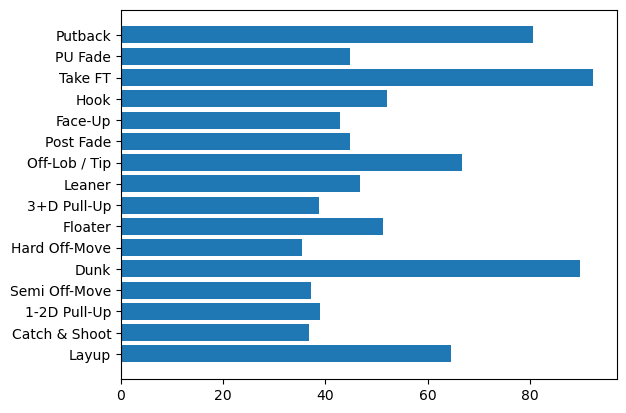

In [91]:
shotConversion = []
shotType = []
for shot_type in data.result_type.unique():
    shot_data = data.loc[data.result_type == shot_type]
    made_shots = shot_data.loc[shot_data.result_pts != 0.0]
    if len(made_shots.result_type) >= 100:
        shotType.append(shot_type)
        shotConversion.append(100*len(made_shots.result_type)/len(shot_data.result_type))
    if len(shot_data.result_type) != 0:
        print(shot_type, ": Shots Taken:", len(shot_data.result_type), "Shots W Points:",
              len(made_shots.result_type), "\nConversion Rate:", 100*len(made_shots.result_type)/len(shot_data.result_type),
              "%\nTotal Points:", shot_data.result_pts.sum(), "\n")
plt.barh(shotType, shotConversion)

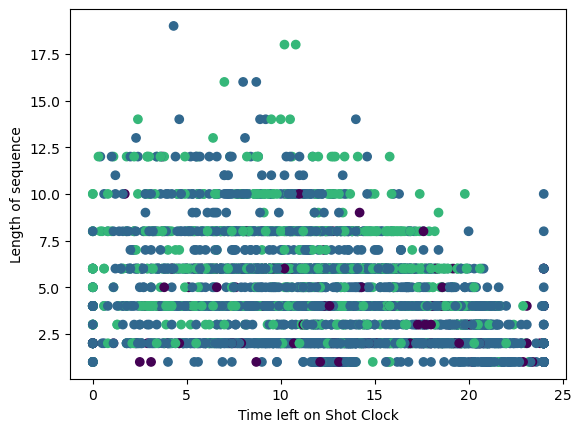

In [100]:
convertedShots = sequence_data.loc[sequence_data.result_pts != 0]
plt.scatter(convertedShots.result_shotclock, convertedShots.game_date, c=convertedShots.result_pts)
plt.xlabel("Time left on Shot Clock")
plt.ylabel("Length of sequence")
plt.show()